Dataset: https://www.kaggle.com/datasets/ahmedshahriarsakib/uber-eats-usa-restaurants-menus 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
menu = pd.read_csv(r<insert your path here>)
rest = pd.read_csv(r<insert your path here>)

In [3]:
print(rest.columns)
print(menu.columns)


Index(['id', 'position', 'name', 'score', 'ratings', 'category', 'price_range',
       'full_address', 'zip_code', 'lat', 'lng'],
      dtype='object')
Index(['restaurant_id', 'category', 'name', 'description', 'price'], dtype='object')


In [4]:
menu.head(5)

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD


In [5]:
rest.head(5)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


In [6]:
print(menu["restaurant_id"].value_counts())
print("*"* 30)
print(menu["category"].value_counts())
print("*"* 30)
print(menu["name"].value_counts())
print("*"* 30)
print(menu["description"].value_counts())
print("*"* 30)

restaurant_id
32786    5236
47639    2363
2811     2138
26674    1901
28738    1900
         ... 
12294       1
14240       1
18354       1
48852       1
25555       1
Name: count, Length: 63309, dtype: int64
******************************
category
Picked for you                     231691
Beverages                          157077
Sides                              149158
Sandwiches                         146754
Drinks                             138303
                                    ...  
Simply Juice – Cold Pressed             1
BYO 14                                  1
Coconut Shrimp                          1
Fried Lobster, Fish, and Shrimp         1
Create The Bun Of Day                   1
Name: count, Length: 73048, dtype: int64
******************************
name
Bottled Water              8555
French Fries               8205
Iced Tea                   5431
Onion Rings                5269
Sprite                     5060
                           ... 
Smart Water\n       

In [7]:
print(menu.shape)
print(rest.shape)

(5117217, 5)
(63469, 11)


#### About Dataset - restaurants-menus.csv
It contains lists of restaurants and their menus in the USA that are partnered with Uber Eats. 
There are 5 columns:
1. restaurant id <br>
2. category <br>
3. name <br>
4. description <br>
5. price <br>

In [8]:
print(rest["ratings"].value_counts())

ratings
200.0    1812
10.0      769
12.0      721
11.0      704
13.0      634
         ... 
369.0       1
466.0       1
360.0       1
311.0       1
437.0       1
Name: count, Length: 433, dtype: int64


In [9]:
print(rest.isna)

<bound method DataFrame.isna of           id  position                                            name  score  \
0          1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1          2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2          3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3          4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4          5       162                Nelson Brothers Cafe (17th St N)    4.7   
...      ...       ...                                             ...    ...   
63464  63465         2                           IHOP (4321 N 10th St)    4.6   
63465  63466        29                       Feldman's - N 10th Street    NaN   
63466  63467        27                           Feldman's - N 23rd St    NaN   
63467  63468        19           Church's Chicken (620 S. 10th Street)    4.3   
63468  63469         9                       7-Eleven (1600 S 23rd St)    NaN

##### Feature Engineering

In [10]:
df = menu.merge(rest, left_on="restaurant_id", right_on="id", how="left")

In [11]:
print(df.columns)

Index(['restaurant_id', 'category_x', 'name_x', 'description', 'price', 'id',
       'position', 'name_y', 'score', 'ratings', 'category_y', 'price_range',
       'full_address', 'zip_code', 'lat', 'lng'],
      dtype='object')


In [12]:
df.head()

,restaurant_id,category_x,name_x,description,price,id,position,name_y,score,ratings,category_y,price_range,full_address,zip_code,lat,lng
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703


In [13]:
print(df["category_x"].value_counts())

category_x
Picked for you                     231691
Beverages                          157077
Sides                              149158
Sandwiches                         146754
Drinks                             138303
                                    ...  
Simply Juice – Cold Pressed             1
BYO 14                                  1
Coconut Shrimp                          1
Fried Lobster, Fish, and Shrimp         1
Create The Bun Of Day                   1
Name: count, Length: 73048, dtype: int64


In [14]:
print(df["category_y"].value_counts())

category_y
Fast Food, Sandwich, American                       258781
Pharmacy, Convenience, Everyday Essentials, Baby    174307
Mexican, Latin American, New Mexican                145308
Burgers, American, Sandwiches                       120467
American, Burgers, Fast Food                        119582
                                                     ...  
Mexican, New Mexican, Latin American, Alcohol            1
Asian, Asian Fusion, Juice and Smoothies                 1
French, Bakery, Desserts                                 1
Asian, Tempura, Healthy                                  1
Mediterranean, Greek, Middle Eastern                     1
Name: count, Length: 15557, dtype: int64


In [15]:
df = df.rename(columns={
    "category_x": "menu_category",
    "category_y": "cuisine_type"
})

In [16]:
df = df.rename(columns={
    "name_x": "dish_name",
    "name_y": "restaurant_name"
})


In [17]:
df['price'] = df['price'].str.replace("USD", "").str.replace("$", "").str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [18]:
df['cuisine_type'] = df['cuisine_type'].astype(str)

In [19]:
df['menu_category'] = df['menu_category'].fillna("Unknown")
df['cuisine_type'] = df['cuisine_type'].fillna("Unknown")

In [20]:
df.head(10)

,restaurant_id,menu_category,dish_name,description,price,id,position,restaurant_name,score,ratings,cuisine_type,price_range,full_address,zip_code,lat,lng
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
5,1,Extra Large Pizza,Extra Large Pepperoni Slice,Slice.,3.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
6,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon Slice,NaN,3.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
7,1,Extra Large Pizza,Extra Large Meat Lovers Slice,Slice.,3.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
8,1,Extra Large Pizza,Extra Large Supreme Slice,Slice.,3.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
9,1,Extra Large Pizza,Extra Large 5 Cheese Slice,Slice.,3.99,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703


##### Restaurant level analysis

C:\Users\pagar\AppData\Local\Temp\ipykernel_29480\2306959944.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")


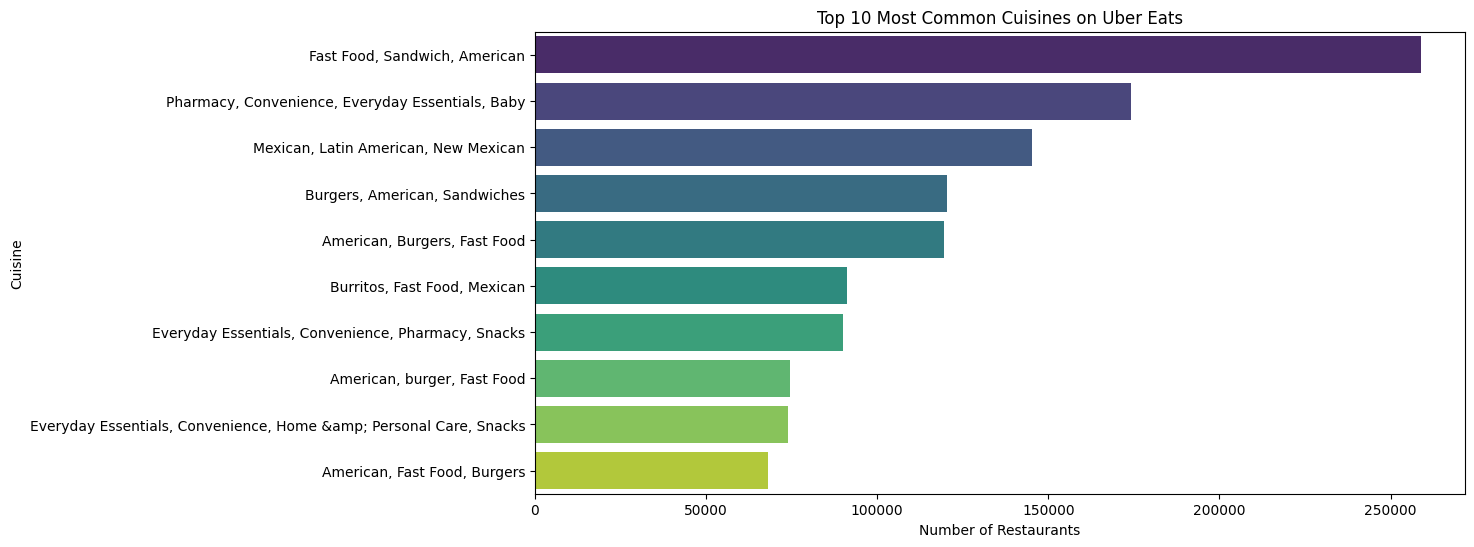

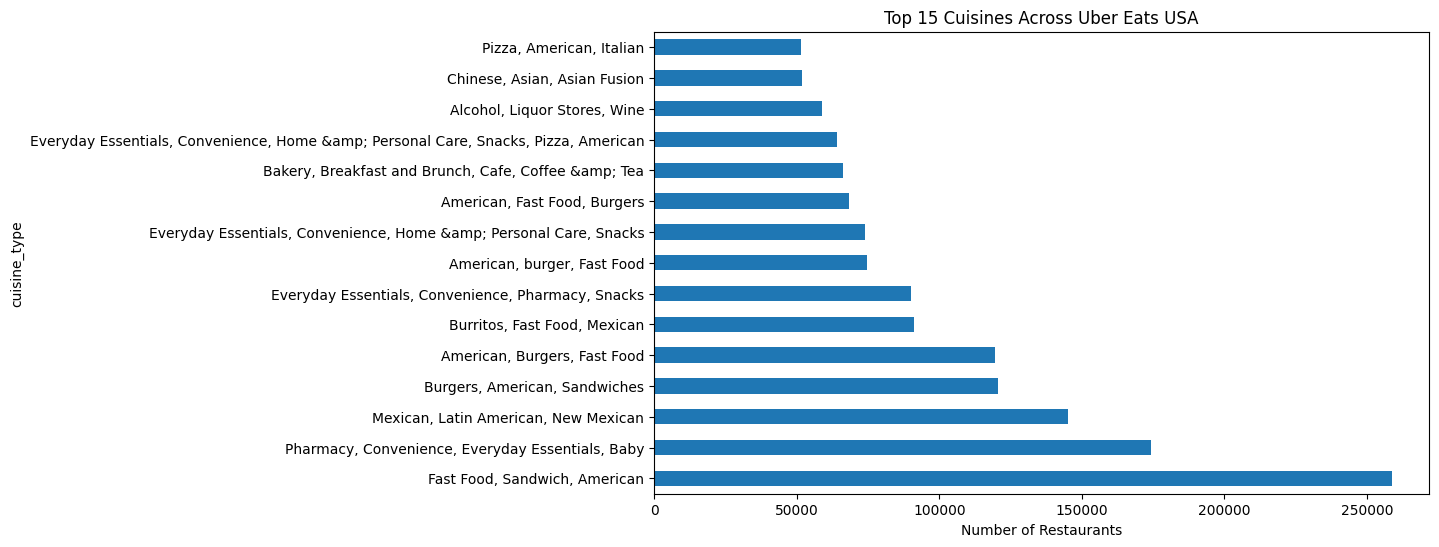

In [21]:
# Cuisine popularity in the USA
import matplotlib.pyplot as plt
import seaborn as sns

top_cuisines = df['cuisine_type'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="viridis")
plt.title("Top 10 Most Common Cuisines on Uber Eats")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


df['cuisine_type'].value_counts().head(15).plot(kind='barh', figsize=(10,6))
plt.title("Top 15 Cuisines Across Uber Eats USA")
plt.xlabel("Number of Restaurants")
plt.show()


In [22]:
# Restaurant distribution by state/
df['state'] = df['full_address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}')
df['state'].value_counts().head(10)

state
PR    399
MD     95
TX     61
DC     28
Name: count, dtype: int64

Text(0, 0.5, 'Count')

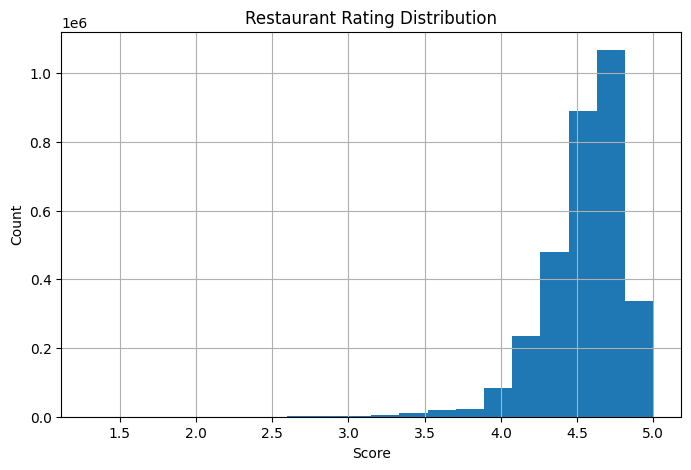

In [23]:
df['score'].hist(bins=20, figsize=(8,5))
plt.title("Restaurant Rating Distribution")
plt.xlabel("Score")
plt.ylabel("Count")

##### Menu Analysis

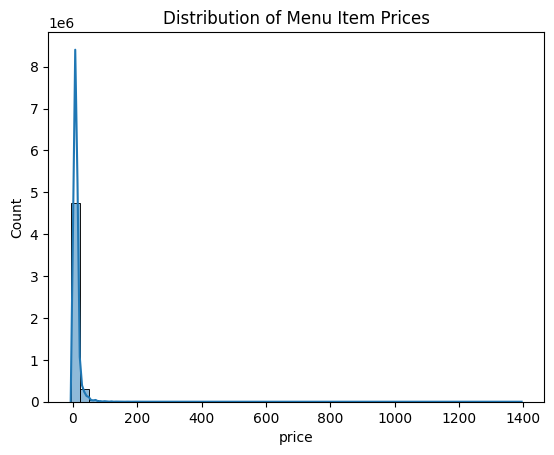

In [24]:
# Price distribution of menu items
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Menu Item Prices")
plt.show()


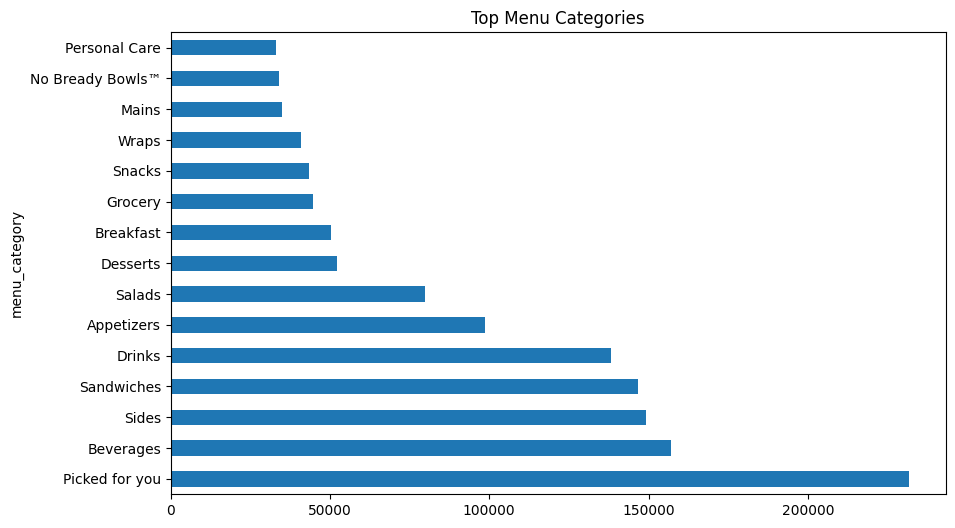

In [25]:
# most common menu category

df['menu_category'].value_counts().head(15).plot(kind="barh", figsize=(10,6))
plt.title("Top Menu Categories")
plt.show()


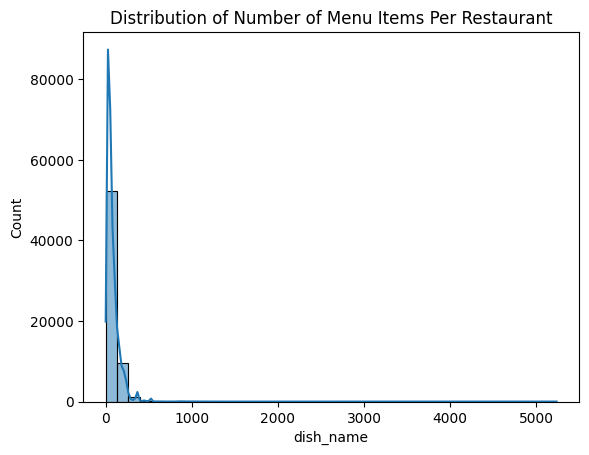

In [26]:
menu_size = df.groupby('restaurant_id')['dish_name'].count()
sns.histplot(menu_size, bins=40, kde=True)
plt.title("Distribution of Number of Menu Items Per Restaurant")
plt.show()


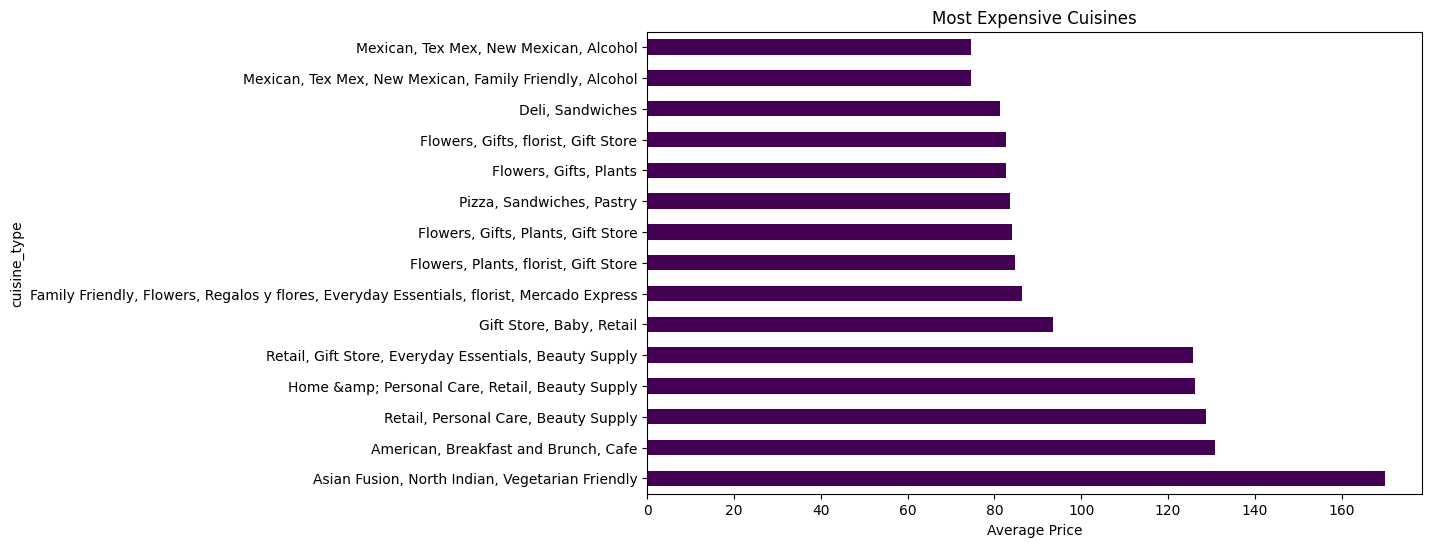

In [27]:
#Average price by cuisine type
avg_price = df.groupby('cuisine_type')['price'].mean().sort_values(ascending=False).head(15)

avg_price.plot(kind='barh', figsize=(10,6), cmap="viridis")
plt.title("Most Expensive Cuisines")
plt.xlabel("Average Price")
plt.show()



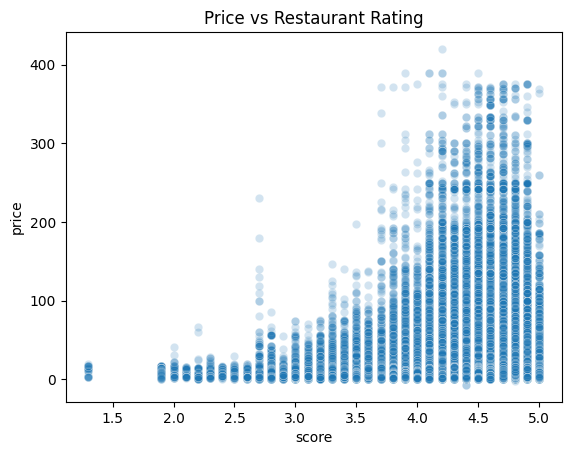

In [28]:
#Price vs Rating Scatter Plot
sns.scatterplot(data=df, x='score', y='price', alpha=0.2)
plt.title("Price vs Restaurant Rating")
plt.show()

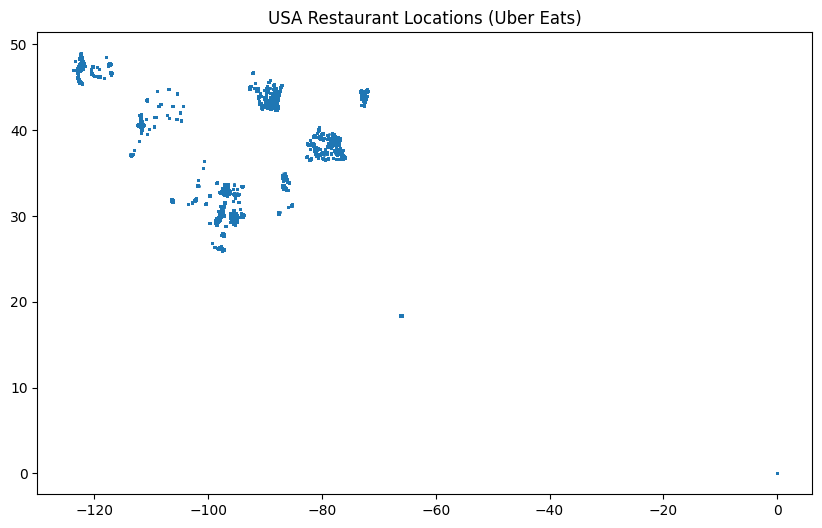

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df['lng'], df['lat'], s=1, alpha=0.3)
plt.title("USA Restaurant Locations (Uber Eats)")
plt.show()


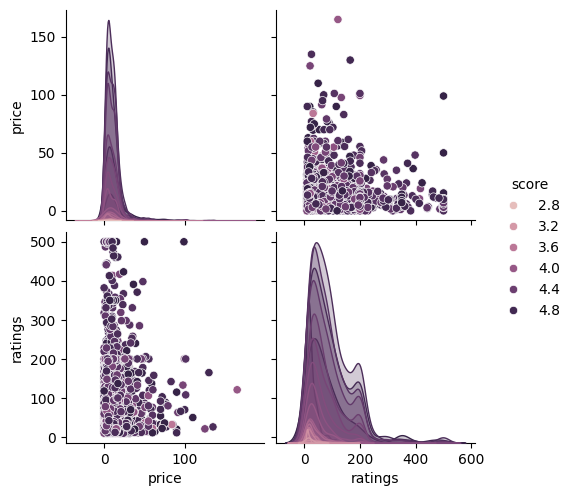

In [30]:
import seaborn as sns

df_small = df[['price', 'score', 'ratings']].dropna().sample(5000)

sns.pairplot(df_small, hue='score')
